In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe=pd.read_excel('creep data.xlsx')

In [3]:
dataframe

,Alloy grade,Ni,Cr,Co,Fe,Al,Ti,Nb,Mo,W,...,solution treatment temperature,solution treatment time,γ'/γ'' phases dissolution temperature (℃),Stable aging temperature (℃),Stable aging time (h),Aging temperature (℃),Aging time (h),Creep rupture life,Evaluation of the heat treatment process,1 means the added heat treatment process has a positive effect on creep rupture life
0,Waspaloy,57.254,19.31,13.39,1.08,1.44,3.12,0.0,4.30,0.0,...,1080,4.0,1037.00,845,24,760,16,1949.00,1,NaN
1,Waspaloy,57.254,19.31,13.39,1.08,1.44,3.12,0.0,4.30,0.0,...,1080,4.0,1037.00,845,24,760,16,1550.00,1,NaN
2,Waspaloy,57.254,19.31,13.39,1.08,1.44,3.12,0.0,4.30,0.0,...,1080,4.0,1037.00,845,24,760,16,1995.00,1,0 means the added heat treatment process has a...
3,Waspaloy,59.345,18.30,12.77,1.06,1.37,2.84,0.0,4.27,0.0,...,1020,4.0,1007.91,845,4,760,16,46.50,0,NaN
4,Waspaloy,59.345,18.30,12.77,1.06,1.37,2.84,0.0,4.27,0.0,...,1020,4.0,1007.91,845,4,760,16,22.50,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Rene41,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,...,1120,0.5,1048.46,800,8,0,0,50.45,1,NaN
261,Rene41,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,...,1120,0.5,1048.46,800,16,0,0,48.00,1,NaN
262,Rene41,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,...,1120,0.5,1048.46,900,1,0,0,9.68,0,NaN
263,Rene41,51.204,18.77,10.88,4.50,1.52,3.10,0.0,9.87,0.0,...,1120,0.5,1048.46,900,8,0,0,25.00,0,NaN


In [4]:
dataframe=dataframe.drop(['Alloy grade','1 means the added heat treatment process has a positive effect on creep rupture life'],axis=1)

In [5]:
data_original=dataframe.values

In [6]:
data_creep_time=data_original[:,-2]
data_creep_time=np.log((data_creep_time).astype('float'))
from sklearn.preprocessing import PowerTransformer
data_feature=data_original[:,:-2]
from sklearn.preprocessing import MinMaxScaler
data_features_MinMaxScalers=MinMaxScaler().fit_transform(data_feature)
pt = PowerTransformer()
data_features_MinMaxScalers=pt.fit_transform(data_features_MinMaxScalers)
from sklearn.utils import shuffle
x_data_creep_time,y_data_creep_time=shuffle(data_features_MinMaxScalers,data_creep_time)
x_train_time,y_train_time=x_data_creep_time[:-25,:],y_data_creep_time[:-25]
x_test_time,y_test_time=x_data_creep_time[-25:,:],y_data_creep_time[-25:]

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
def percentage_error(y, y_predict ):
    error = np.average( abs(np.subtract(y_predict, y) / y))
    return error * 100
EP_scorer = make_scorer(percentage_error, greater_is_better = False)
def r_mean_squared_error(y, y_predict):
    error = mean_squared_error(y, y_predict)
    return  error ** 0.5
RMSE_scorer = make_scorer(r_mean_squared_error, greater_is_better = False)


# SVR

74.80000000000035 0.1 9.808044257773895
交叉验证误差为: 9.808044257773895
训练集百分比误差为: 4.79317521910331%
测试集百分比误差为: 2.5465413047528234%
训练集均方根误差为: 0.31636046779444615
测试集均方根误差为: 0.14689315269405528


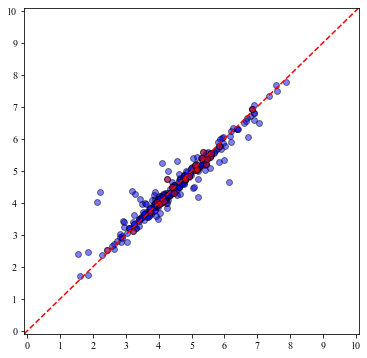

In [9]:
def SVR(data_train,target_train,data_test,target_test):
    from sklearn.svm import SVR
    from sklearn.model_selection import KFold,cross_val_score
    from sklearn.metrics import mean_squared_error,r2_score
    from sklearn.utils import shuffle
    import matplotlib.pyplot as plt
    from sklearn.model_selection import RandomizedSearchCV
    #对gamma调参
    from sklearn.model_selection import GridSearchCV
    model_svr=SVR(kernel='rbf')
    C=list(np.arange(50,75,0.2))
    gamma=list(np.arange(0.1,25,0.2))
    param_grid = {'C': C,
              'gamma': gamma}    
    grids = GridSearchCV(model_svr, param_grid, cv=10, scoring=EP_scorer, n_jobs=-1)
    grids_result = grids.fit(data_train, target_train)
    performance_cross_validation = - grids_result.best_score_
    best_clf = grids_result.best_estimator_
    predict_train = best_clf.predict(data_train)
    predict_test = best_clf.predict(data_test)
#     bestkernel=grids_result.best_kernel_['kernel']
    bestgamma = grids_result.best_params_['gamma']
    bestcost = grids_result.best_params_['C']
    besterror = - grids_result.best_score_
    print(bestcost,bestgamma,besterror)
    performance_ep_train = percentage_error(target_train, predict_train)
    performance_ep_test = percentage_error(target_test, predict_test)
    performance_r_mse_train = (mean_squared_error(target_train, predict_train)) ** 0.5
    performance_r_mse_test = (mean_squared_error(target_test, predict_test)) ** 0.5
    print('交叉验证误差为: ' + str(performance_cross_validation) )
    print('训练集百分比误差为: ' + str(performance_ep_train) + '%')
    print('测试集百分比误差为: ' + str(performance_ep_test) + '%')
    print('训练集均方根误差为: ' + str(performance_r_mse_train) )
    print('测试集均方根误差为: ' + str(performance_r_mse_test) )
    plt.rc('font',family='Times New Roman')
    plt.figure(figsize=(6,6))
    plt.plot([-0.1,10.1],[-0.1,10.1],'r--')
    from matplotlib.pyplot import MultipleLocator
    x_major_locator=MultipleLocator(1)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.xlim(-0.1,10.1)
    plt.ylim(-0.1,10.1)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.scatter(target_train,predict_train,alpha=0.5,color='blue',edgecolor='k',s=35,label=' training data(NIMS) ')
    plt.scatter(target_test,predict_test,alpha=0.5,color='red',edgecolor='k',s=35,label=' testing data(GD&GHD HT)')
    plt.show()
data_train=x_data_creep_time
target_train= y_data_creep_time
data_test=x_test_time
target_test=y_test_time
SVR(data_train,target_train,data_test,target_test)

In [68]:
SS_R=sum((data_creep_time-y_cv_SVR)**2)
SS_T=sum((data_creep_time-np.mean(y_cv_SVR))**2)
r2=1-(float(SS_R))/SS_T
r2

0.758257954947384

In [86]:
data_creep_time=data_original[:,-2]
data_creep_time=np.log((data_creep_time).astype('float'))
from sklearn.preprocessing import PowerTransformer
data_feature=data_original[:,:-2]
from sklearn.preprocessing import MinMaxScaler
data_features_MinMaxScalers=MinMaxScaler().fit_transform(data_feature)
pt = PowerTransformer()
data_features_MinMaxScalers=pt.fit_transform(data_features_MinMaxScalers)
from sklearn.utils import shuffle
x_data_creep_time,y_data_creep_time=shuffle(data_features_MinMaxScalers,data_creep_time)
x_train_time,y_train_time=x_data_creep_time[:-25,:],y_data_creep_time[:-25]
x_test_time,y_test_time=x_data_creep_time[-25:,:],y_data_creep_time[-25:]

# RF

17 25 12.241762113680851
交叉验证误差为: 12.241762113680851
训练集百分比误差为: 4.890243077128815%
测试集百分比误差为: 5.942978872717333%
训练集均方根误差为: 0.2918517256628442
测试集均方根误差为: 0.34543213634825415


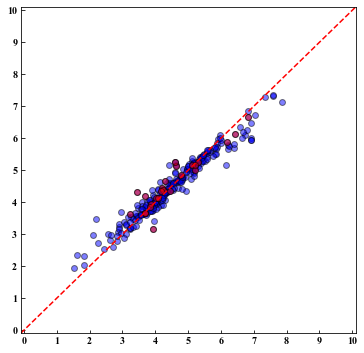

In [285]:
def SVR(data_train,target_train,data_test,target_test):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import KFold,cross_val_score
    from sklearn.metrics import mean_squared_error,r2_score
    from sklearn.utils import shuffle
    import matplotlib.pyplot as plt
    from sklearn.model_selection import RandomizedSearchCV
    #对gamma调参
    from sklearn.model_selection import GridSearchCV
    model_svr=RandomForestRegressor()
    n_estimators=list(np.arange(1,25,1))
    max_depth=list(np.arange(25,50,1))
    param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth}    
    grids = GridSearchCV(model_svr, param_grid, cv=10, scoring=EP_scorer, n_jobs=-1)
    grids_result = grids.fit(data_train, target_train)
    performance_cross_validation = - grids_result.best_score_
    best_clf = grids_result.best_estimator_
    predict_train = best_clf.predict(data_train)
    predict_test = best_clf.predict(data_test)
#     bestkernel=grids_result.best_kernel_['kernel']
    bestn_estimators = grids_result.best_params_['n_estimators']
    bestmax_depth = grids_result.best_params_['max_depth']
    besterror = - grids_result.best_score_
    print(bestn_estimators,bestmax_depth,besterror)
    performance_ep_train = percentage_error(target_train, predict_train)
    performance_ep_test = percentage_error(target_test, predict_test)
    performance_r_mse_train = (mean_squared_error(target_train, predict_train)) ** 0.5
    performance_r_mse_test = (mean_squared_error(target_test, predict_test)) ** 0.5
    print('交叉验证误差为: ' + str(performance_cross_validation) )
    print('训练集百分比误差为: ' + str(performance_ep_train) + '%')
    print('测试集百分比误差为: ' + str(performance_ep_test) + '%')
    print('训练集均方根误差为: ' + str(performance_r_mse_train) )
    print('测试集均方根误差为: ' + str(performance_r_mse_test) )
    plt.rc('font',family='Times New Roman')
    plt.figure(figsize=(6,6))
    plt.plot([-0.1,10.1],[-0.1,10.1],'r--')
    from matplotlib.pyplot import MultipleLocator
    x_major_locator=MultipleLocator(1)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.xlim(-0.1,10.1)
    plt.ylim(-0.1,10.1)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.scatter(target_train,predict_train,alpha=0.5,color='blue',edgecolor='k',s=35,label=' training data(NIMS) ')
    plt.scatter(target_test,predict_test,alpha=0.5,color='red',edgecolor='k',s=35,label=' testing data(GD&GHD HT)')
    plt.show()
data_train=x_data_creep_time
target_train= y_data_creep_time
data_test=x_test_time
target_test=y_test_time
SVR(data_train,target_train,data_test,target_test)

# GBR

In [289]:
def SVR(data_train,target_train,data_test,target_test):
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import KFold,cross_val_score
    from sklearn.metrics import mean_squared_error,r2_score
    from sklearn.utils import shuffle
    import matplotlib.pyplot as plt
    from sklearn.model_selection import RandomizedSearchCV
    #对gamma调参
    from sklearn.model_selection import GridSearchCV
    model_svr=GradientBoostingRegressor()
    n_estimators=list(np.arange(25,50,1))
    max_depth=list(np.arange(20,27,1))
    param_grid = { 'loss':('squared_error','absolute_error','huber','quantile'),'n_estimators': n_estimators,'max_depth': max_depth}    
    grids = GridSearchCV(model_svr, param_grid, cv=10, scoring=EP_scorer, n_jobs=-1)
    grids_result = grids.fit(data_train, target_train)
    performance_cross_validation = - grids_result.best_score_
    best_clf = grids_result.best_estimator_
    predict_train = best_clf.predict(data_train)
    predict_test = best_clf.predict(data_test)
#     bestkernel=grids_result.best_kernel_['kernel']
    bestloss = grids_result.best_params_['loss']
    bestn_estimators = grids_result.best_params_['n_estimators']
    bestmax_depth = grids_result.best_params_['max_depth']
    besterror = - grids_result.best_score_
    print(bestloss,bestn_estimators,bestmax_depth,besterror)
    performance_ep_train = percentage_error(target_train, predict_train)
    performance_ep_test = percentage_error(target_test, predict_test)
    performance_r_mse_train = (mean_squared_error(target_train, predict_train)) ** 0.5
    performance_r_mse_test = (mean_squared_error(target_test, predict_test)) ** 0.5
    print('交叉验证误差为: ' + str(performance_cross_validation) )
    print('训练集百分比误差为: ' + str(performance_ep_train) + '%')
    print('测试集百分比误差为: ' + str(performance_ep_test) + '%')
    print('训练集均方根误差为: ' + str(performance_r_mse_train) )
    print('测试集均方根误差为: ' + str(performance_r_mse_test) )
    plt.rc('font',family='Times New Roman')
    plt.figure(figsize=(6,6))
    plt.plot([-0.1,10.1],[-0.1,10.1],'r--')
    from matplotlib.pyplot import MultipleLocator
    x_major_locator=MultipleLocator(1)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.xlim(-0.1,10.1)
    plt.ylim(-0.1,10.1)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.scatter(target_train,predict_train,alpha=0.5,color='blue',edgecolor='k',s=35,label=' training data(NIMS) ')
    plt.scatter(target_test,predict_test,alpha=0.5,color='red',edgecolor='k',s=35,label=' testing data(GD&GHD HT)')
    plt.show()
data_train=x_data_creep_time
target_train= y_data_creep_time
data_test=x_test_time
target_test=y_test_time
SVR(data_train,target_train,data_test,target_test)

KeyboardInterrupt: 

# MLPR 

In [51]:
def BPNN(data_train, target_train,data_test,target_test):  
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import cross_val_score
    from sklearn.neural_network import MLPRegressor
    list_a=list(range(1, 50, 1))
    tuple_1=[]
    for i in list_a:
        for j in list_a:
            tuple_1.append((i,j))
    param_grid = {'hidden_layer_sizes':tuple_1 ,
                  'activation': ('identity','logistic','tanh','relu'),
                  'solver':['lbfgs','sgd','adam']}
    BPNN_creep_time= MLPRegressor( )
    grids = GridSearchCV(BPNN_creep_time, param_grid, cv=10, scoring=EP_scorer, n_jobs=-1)
    grids_result = grids.fit(data_train, target_train)
    performance_cross_validation = - grids_result.best_score_
    best_clf = grids_result.best_estimator_
    predict_train = best_clf.predict(data_train)
    predict_test=best_clf.predict(data_test)
    besthidden_layer_sizes=grids_result.best_params_['hidden_layer_sizes']
    bestactivation=grids_result.best_params_['activation']
    bestsolver=grids_result.best_params_['solver']
    besterror = - grids_result.best_score_
    print(besthidden_layer_sizes,bestactivation,bestsolver,besterror)
    from sklearn.metrics import r2_score
    performance_ep_train = r2_score(target_train, predict_train)
    performance_ep_test = r2_score(target_test, predict_test)
    performance_r_mse_train = (mean_squared_error(target_train, predict_train)) ** 0.5
    performance_r_mse_test = (mean_squared_error(target_test, predict_test)) ** 0.5
    print('交叉验证误差为: ' + str(performance_cross_validation) )
    print('训练集百分比误差为: ' + str(performance_ep_train) )
    print('测试集百分比误差为: ' + str(performance_ep_test))
    print('训练集均方根误差为: ' + str(performance_r_mse_train) )
    print('测试集均方根误差为: ' + str(performance_r_mse_test) )
    plt.rc('font',family='Times New Roman')
    plt.figure(figsize=(6,6))
    plt.plot([-0.1,10.1],[-0.1,10.1],'r--')
    from matplotlib.pyplot import MultipleLocator
    x_major_locator=MultipleLocator(1)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.xlim(-0.1,10.1)
    plt.ylim(-0.1,10.1)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.scatter(target_train,predict_train,alpha=0.5,color='blue',edgecolor='k',s=35,label=' training data(NIMS) ')
    plt.scatter(target_test,predict_test,alpha=0.5,color='red',edgecolor='k',s=35,label=' testing data(GD&GHD HT)')
    plt.show()
data_train=x_data_creep_time
target_train= y_data_creep_time
data_test=x_test_time
target_test=y_test_time
BPNN(data_train, target_train,data_test,target_test)

KeyboardInterrupt: 

# LR

Cross-validation results:
Folds:10,mean R2：0.438
Folds:10,mean RMSE：0.786


15.084472182853995

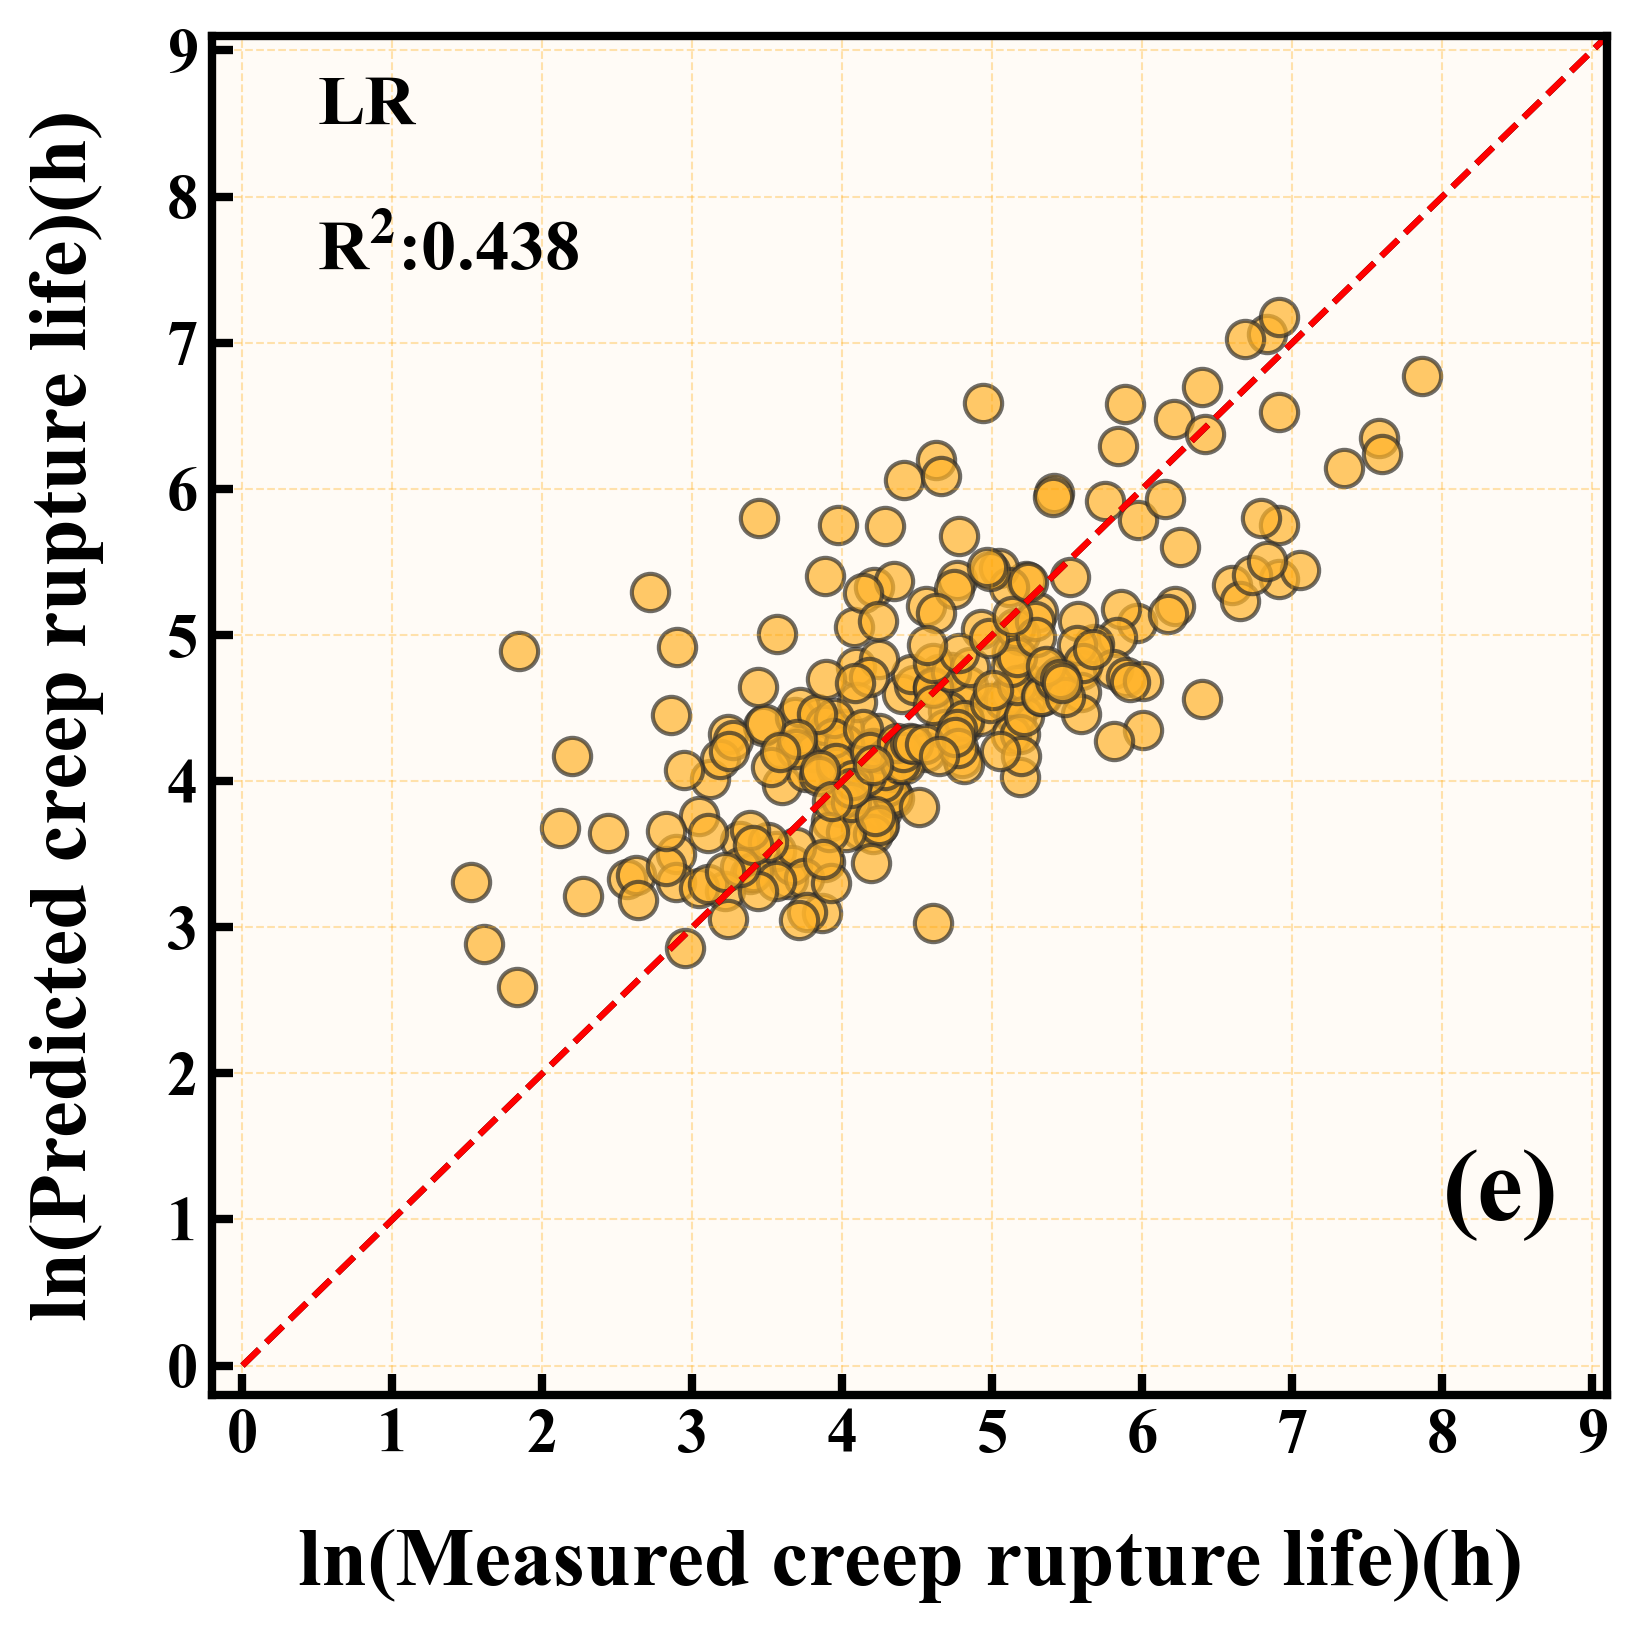

In [293]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn import linear_model
model_SVR=linear_model.LinearRegression()
crossvalidation=KFold(n_splits=10,shuffle=True)
r2_scores_train=cross_val_score(model_SVR,data_features_MinMaxScalers,data_creep_time,scoring='r2',cv=crossvalidation)
rmse_scores_train=cross_val_score(model_SVR,data_features_MinMaxScalers,data_creep_time,scoring='neg_root_mean_squared_error',cv=crossvalidation)
print('Cross-validation results:')
print('Folds:%i,mean R2：%.3f'%(len(r2_scores_train),np.mean(r2_scores_train)))
print('Folds:%i,mean RMSE：%.3f'%(len(rmse_scores_train),-np.mean(rmse_scores_train)))
from sklearn.model_selection import cross_val_predict
y_cv_SVR=cross_val_predict(model_SVR,data_features_MinMaxScalers,data_creep_time,cv=crossvalidation)
R_2=np.mean(r2_scores_train)
import matplotlib.pyplot as plt
# plt.rcParams['axes.facecolor']='snow'
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.weight':'bold'})
plt.figure(figsize=(6,6),dpi=300)
plt.plot([0,9.1],[0,9.1],'k--')
from matplotlib.pyplot import MultipleLocator
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(-0.2,9.1)
plt.ylim(-0.2,9.1)
from matplotlib import rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.xticks(fontproperties = 'Times New Roman', size = 15,fontweight='bold')
plt.yticks(fontproperties = 'Times New Roman', size = 15,fontweight='bold')
plt.tick_params(width=2,length=5)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
x = [-0.2, -0.2, 9.1,9.1]
y = [-0.2, 9.1, 9.1,-0.2]
plt.fill(x, y, color="papayawhip",alpha=0.2)
plt.plot([0,9.1],[0,9.1],'r--')
plt.xlabel('ln(Measured creep rupture life)(h)',fontweight='bold',fontsize=20,labelpad=15)
plt.ylabel('ln(Predicted creep rupture life)(h)',fontweight='bold',fontsize=20,labelpad=15)
plt.text(0.5, 8.5, 'LR',fontdict={'fontproperties':'Times New Roman','size': 17, 'color': 'k'})
plt.text(0.5, 7.5,'R$^{\it2}$:%.3f'%R_2,fontdict={'fontproperties':'Times New Roman','size': 17, 'color': 'k'})
plt.grid(color = 'orange', linestyle = '--', linewidth = 0.5,alpha=0.3)
plt.scatter(data_creep_time,y_cv_SVR,s=80,c='orange',edgecolor='k',alpha=0.7)
plt.text(8, 1,'(e)',fontdict={'fontproperties':'Times New Roman','size': 25, 'color': 'k'})
plt.savefig( 'LR_有热处理制度.jpg',dpi=600)
y=data_creep_time
y_predict=y_cv_SVR
percentage_error(y, y_predict )